### Carregamento dos dados

In [101]:
import pandas as pd

# Formata os dados com duas casas decimais representando os centavos
pd.options.display.float_format = '{:20,.2f}'.format

# Função para carregar os dados e arredonda-los
def load_spreadsheet(file_name):
    try:
        data = pd.read_csv(file_name)
        data.round(4)
        return data
    except:
        print "Não foi possível carregar o arquivo."
        return null

# Carregando os dados da Ambev
data_abev = load_spreadsheet("abev3.csv")
print "{} exemplos \n {} características".format(*data_abev.shape)
print "Exemplo dos dados da Ambev:"
print data_abev.head()

# Carregando os dados do índice Bovespa
data_ibov = load_spreadsheet("ibov.csv")
print "{} exemplos \n {} características".format(*data_ibov.shape)
print "Exemplo dos dados do índice Bovespa:"
print data_ibov.head()

# Reordena conjunto de dados para que as primeiras linhas sejam os dados mais antigos
def reverse_df(df, columns):
    len_df = len(df)
    values = df.values
    sorted_data = []
    for i in reversed(df.index):
        sorted_data.append(values[i])
    return pd.DataFrame(sorted_data, columns=columns)
    
data_abev = reverse_df(data_abev, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
data_ibov = reverse_df(data_ibov, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
print "Dados reordenados"
print data_abev.head()
print data_ibov.head()

912 exemplos 
 6 características
Exemplo dos dados da Ambev:
        Date                 Open                 High                  Low  \
0  20-Jul-17                18.76                18.89                18.71   
1  19-Jul-17                18.88                18.88                18.66   
2  18-Jul-17                18.88                18.88                18.65   
3  17-Jul-17                18.80                18.92                18.71   
4  14-Jul-17                18.69                18.83                18.66   

                 Close    Volume  
0                18.78   7840500  
1                18.82   7911100  
2                18.75   6018300  
3                18.84  10140000  
4                18.75   5512500  
912 exemplos 
 6 características
Exemplo dos dados do índice Bovespa:
        Date                 Open                 High                  Low  \
0  20-Jul-17            65,178.17            65,505.38            64,897.81   
1  19-Jul-17            65

### Estatísticas

In [102]:
from IPython.display import display

# Exibe um conjunto básico de estatísticas dos dados da Ambev
display(data_abev.describe())

# Exibe um conjunto básico de estatísticas dos dados do índice Bovespa
display(data_ibov.describe())

,Open,High,Low,Close,Volume
count,912.00,912.00,912.00,912.00,912.00
mean,17.84,18.03,17.64,17.85,"12,077,422.26"
std,1.28,1.27,1.28,1.28,"5,715,852.62"
min,15.02,15.48,14.95,15.20,"2,539,800.00"
25%,16.66,16.82,16.50,16.67,"8,554,025.00"
50%,18.06,18.23,17.85,18.06,"10,858,200.00"
75%,18.97,19.14,18.75,18.95,"13,956,125.00"
max,20.40,20.46,20.19,20.35,"47,040,600.00"


,Open,High,Low,Close
count,912.00,912.00,912.00,912.00
mean,"53,770.61","54,313.90","53,248.74","53,783.58"
std,"6,603.44","6,606.11","6,600.23","6,613.26"
min,"37,500.79","38,031.22","37,046.07","37,497.48"
25%,"49,082.84","49,688.85","48,499.53","49,081.74"
50%,"52,813.55","53,329.19","52,282.78","52,837.21"
75%,"58,351.47","58,885.58","57,913.33","58,368.91"
max,"69,052.09","69,487.58","68,536.46","69,052.03"


### Gráficos

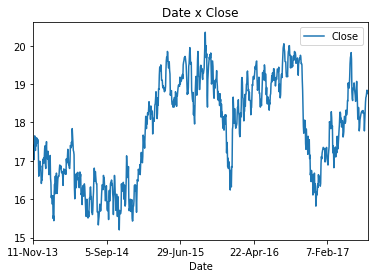

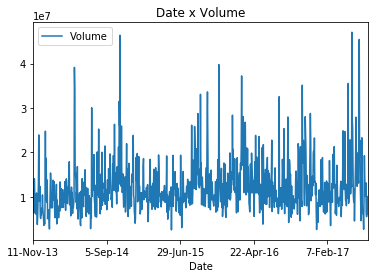

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

data_abev.plot(x='Date', y='Close', title='Date x Close')
data_abev.plot(x='Date', y='Volume', title='Date x Volume')

### Pré-processamento

In [104]:
import numpy as np
from datetime import datetime

# Adiciona a feature Next Day Price ao conjunto de dados
for i in range(len(data_abev)-1):
    data_abev.loc[i, 'Next Day Price'] = data_abev.loc[i+1, 'Close']

# Adiciona variação do preço da ação
for i in range(1, len(data_abev)):
    data_abev.loc[i, 'Change'] = ((data_abev.loc[i, 'Close'] * 100)/data_abev.loc[i-1, 'Close']) - 100

# Adiciona novas features ao conjunto de dados
len_data = len(data_abev)
for i in range(len_data):
    # Adiciona dados do índice Bovespa como feature
    data_abev.loc[i, 'Ibov Close'] = data_ibov.loc[i, 'Close']
    data_abev.loc[i, 'Ibov High'] = data_ibov.loc[i, 'High']
    data_abev.loc[i, 'Ibov Low'] = data_ibov.loc[i, 'Low']
    # Adiciona dia da semana como feature
    data_abev.loc[i, 'Day of Week'] = datetime.strptime(data_abev.loc[i, 'Date'], '%d-%b-%y').weekday()

print "Conjunto de dados com novas features"
print data_abev[0:5]
    
# Verifica se há valores nulos
def have_null_values(data):
    return data.isnull().any().any()

# Verifica se há zeros
def have_zero_numbers(data):
    return (data == 0).any().any()

# Remove nulos caso haja
if have_null_values(data_abev):
    print "Removendo nulos"
    data_abev = data_abev.dropna(how='any')

print "Contém valores nulos: %s" % have_null_values(data_abev)
print "Contém zeros: %s" % have_zero_numbers(data_abev[['Open', 'High', 'Low', 'Close', 'Volume', 'Next Day Price', 'Ibov Close', 'Ibov High', 'Ibov Low']])

print "Procurando por outliers"
for feature in ['Open', 'High', 'Low', 'Close', 'Volume', 'Next Day Price', 'Ibov Close', 'Ibov High', 'Ibov Low']:
    Q1 = np.percentile(data_abev[feature], 25)
    Q3 = np.percentile(data_abev[feature], 75)
    step = (Q3 - Q1) * 1.5
    print "Pontos considerados outliers para a característica '{}':".format(feature)
    display(data_abev[~((data_abev[feature] >= Q1 - step) & (data_abev[feature] <= Q3 + step))])

Conjunto de dados com novas features
        Date                 Open                 High                  Low  \
0  11-Nov-13                17.30                17.40                17.02   
1  12-Nov-13                17.30                17.37                16.76   
2  13-Nov-13                17.09                17.19                16.83   
3  14-Nov-13                17.25                17.50                17.05   
4  18-Nov-13                17.33                17.65                17.31   

                 Close    Volume       Next Day Price               Change  \
0                17.40   7547000                17.06                  nan   
1                17.06  11572700                17.03                -1.95   
2                17.03   6328500                17.47                -0.18   
3                17.47  14056600                17.65                 2.58   
4                17.65  10857900                17.37                 1.03   

            Ibov Cl

,Date,Open,High,Low,Close,Volume,Next Day Price,Change,Ibov Close,Ibov High,Ibov Low,Day of Week


Pontos considerados outliers para a característica 'High':


,Date,Open,High,Low,Close,Volume,Next Day Price,Change,Ibov Close,Ibov High,Ibov Low,Day of Week


Pontos considerados outliers para a característica 'Low':


,Date,Open,High,Low,Close,Volume,Next Day Price,Change,Ibov Close,Ibov High,Ibov Low,Day of Week


Pontos considerados outliers para a característica 'Close':


,Date,Open,High,Low,Close,Volume,Next Day Price,Change,Ibov Close,Ibov High,Ibov Low,Day of Week


Pontos considerados outliers para a característica 'Volume':


,Date,Open,High,Low,Close,Volume,Next Day Price,Change,Ibov Close,Ibov High,Ibov Low,Day of Week
15,4-Dec-13,17.25,17.36,16.60,16.60,23923700,16.85,-3.26,"50,215.79","50,744.43","50,113.76",2.00
33,3-Jan-14,17.41,17.44,16.90,16.90,24766000,16.80,-2.82,"50,981.09","50,981.09","50,268.72",4.00
112,30-Apr-14,16.60,16.70,16.18,16.30,39124500,16.01,-5.01,"51,626.69","51,837.56","51,250.61",2.00
113,2-May-14,16.20,16.38,15.95,16.01,34124500,16.50,-1.78,"52,980.31","53,060.11","51,628.19",4.00
159,10-Jul-14,16.04,16.23,15.65,15.67,30037700,15.70,-2.49,"54,592.75","54,599.50","53,642.99",3.00
178,6-Aug-14,15.34,15.59,15.01,15.46,25240000,15.55,0.85,"56,487.18","56,797.17","55,695.59",2.00
221,6-Oct-14,16.62,16.93,16.38,16.62,26325300,16.44,2.59,"57,115.90","58,897.45","54,542.32",0.00
234,23-Oct-14,15.38,15.48,15.01,15.20,31522500,15.71,-2.12,"50,713.26","52,409.43","50,653.54",3.00
235,24-Oct-14,15.25,15.83,14.99,15.71,25987500,15.65,3.36,"51,940.73","53,145.51","50,595.70",4.00
236,27-Oct-14,15.02,15.66,14.95,15.65,46348100,15.62,-0.38,"50,503.66","51,937.39","48,722.29",0.00


Pontos considerados outliers para a característica 'Next Day Price':


,Date,Open,High,Low,Close,Volume,Next Day Price,Change,Ibov Close,Ibov High,Ibov Low,Day of Week


Pontos considerados outliers para a característica 'Ibov Close':


,Date,Open,High,Low,Close,Volume,Next Day Price,Change,Ibov Close,Ibov High,Ibov Low,Day of Week


Pontos considerados outliers para a característica 'Ibov High':


,Date,Open,High,Low,Close,Volume,Next Day Price,Change,Ibov Close,Ibov High,Ibov Low,Day of Week


Pontos considerados outliers para a característica 'Ibov Low':


,Date,Open,High,Low,Close,Volume,Next Day Price,Change,Ibov Close,Ibov High,Ibov Low,Day of Week


### Algoritmo

In [107]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

tscv = TimeSeriesSplit(n_splits=10)
clf = LinearRegression()

# Retorna dados de teste e treinamento com base nos índices da validação cruzada
def get_train_test(X, y, train_index, test_index):
    return X[0:len(train_index)], X[len(train_index):len(train_index)+len(test_index)], y[0:len(train_index)], y[len(train_index):len(train_index)+len(test_index)]

def get_scores(data_abev, X, y):
    scores = []
    # Calcula precisão do modelo para as diferentes partições do conjunto de dados
    for train_index, test_index in tscv.split(data_abev):
        X_train, X_test, y_train, y_test = get_train_test(X, y, train_index, test_index)
        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))
    return scores
    
# EXPERIMENTO #1: Seleciona as features a serem utilizadas e a variável alvo
print "EXPERIMENTO #1"
X = data_abev[['Volume', 'Close']]
y = data_abev['Next Day Price']
scores = get_scores(data_abev, X, y)
print "Array de notas"
print scores
print "Precisão do modelo %s%%" % (np.mean(scores)*100)

# EXPERIMENTO #2: Seleciona as features a serem utilizadas e a variável alvo
print "EXPERIMENTO #2"
X = data_abev[['Volume', 'Close', 'High', 'Low']]
y = data_abev['Next Day Price']
scores = get_scores(data_abev, X, y)
print "Array de notas"
print scores
print "Precisão do modelo %s%%" % (np.mean(scores)*100)

EXPERIMENTO #1
Array de notas
[0.81291561425612358, 0.48792854143088044, 0.92834237714820056, 0.71730905444092019, 0.6029155403830917, 0.82135172426285108, 0.67692980346945764, 0.91703976970034928, 0.79901912440184875, 0.83643061811437747]
Precisão do modelo 76.0018216761%
EXPERIMENTO #2
Array de notas
[0.80972230719352345, 0.48414523886976035, 0.92845848651995988, 0.71909320439769575, 0.59983611052546526, 0.8219170285519003, 0.68113955893834732, 0.91602017507867084, 0.80150390950263106, 0.83379854053252833]
Precisão do modelo 75.9563456011%


### Refinamento

In [110]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

# EXPERIMENTO #3: Seleciona as features a serem utilizadas e a variável alvo
print "EXPERIMENTO #3"
X = data_abev[['Volume', 'Close', 'High', 'Low', 'Ibov Close']]
y = data_abev['Next Day Price']
scores = get_scores(data_abev, X, y)
print "Array de notas"
print scores
print "Precisão do modelo %s%%" % (np.mean(scores)*100)

# EXPERIMENTO #4: Seleciona as features a serem utilizadas e a variável alvo
print "EXPERIMENTO #4"
X = data_abev[['Volume', 'Close', 'High', 'Low', 'Ibov Close', 'Ibov High']]
y = data_abev['Next Day Price']
scores = get_scores(data_abev, X, y)
print "Array de notas"
print scores
print "Precisão do modelo %s%%" % (np.mean(scores)*100)

# EXPERIMENTO #5: Seleciona as features a serem utilizadas e a variável alvo
print "EXPERIMENTO #5"
X = data_abev[['Volume', 'Close', 'High', 'Low', 'Day of Week']]
y = data_abev['Next Day Price']
scores = get_scores(data_abev, X, y)
print "Array de notas"
print scores
print "Precisão do modelo %s%%" % (np.mean(scores)*100)

# EXPERIMENTO #6: Seleciona as features a serem utilizadas e a variável alvo
print "EXPERIMENTO #6"
X = data_abev[['Volume', 'Close', 'High', 'Low', 'Ibov Close', 'Ibov High', 'Day of Week']]
y = data_abev['Next Day Price']
scores = get_scores(data_abev, X, y)
print "Array de notas"
print scores
print "Precisão do modelo %s%%" % (np.mean(scores)*100)

# EXPERIMENTO #7: Seleciona as features a serem utilizadas e a variável alvo
print "EXPERIMENTO #7"
X = data_abev[['Volume', 'Close']]
y = data_abev['Next Day Price']
scores = get_scores(data_abev, X, y)
print "Array de notas"
print scores
print "Precisão do modelo %s%%" % (np.mean(scores)*100)

# Define qual combinação de paramêtros tentaremos otimizar
parameters = {'fit_intercept': [True, False], 'normalize': [True, False]}
grid_obj = GridSearchCV(LinearRegression(), scoring='r2', param_grid=parameters)
X = data_abev[['Volume', 'Close', 'Change']]
y = data_abev['Next Day Price']
scores_optimized = []
# Testa a melhor combinação de parâmetros com diferentes partições do conjunto de dados
for train_index, test_index in tscv.split(data_abev):
    X_train, X_test, y_train, y_test = get_train_test(X, y, train_index, test_index)
    grid_obj = grid_obj.fit(X_train, y_train)
    scores_optimized.append(grid_obj.score(X_test, y_test))
    
print "Array de notas otimizadas"
print scores_optimized
print "Precisão do modelo após otimização %s%%" % (np.mean(scores_optimized)*100)

EXPERIMENTO #3
Array de notas
[0.65575277966184486, 0.50640060726165204, 0.92873537807906892, 0.62761880198146036, 0.61109587412704602, 0.81658904011370059, 0.67742783426751174, 0.91549758211437604, 0.79631308214563434, 0.82237621729872845]
Precisão do modelo 73.5780719705%
EXPERIMENTO #4
Array de notas
[0.658087159842217, 0.48795373072978226, 0.92874292691334215, 0.62365211564274159, 0.61125737643807132, 0.81683039765747822, 0.67210570010965154, 0.91552267263745801, 0.79590373373737544, 0.82307062325953773]
Precisão do modelo 73.3312643697%
EXPERIMENTO #5
Array de notas
[0.80787750445969952, 0.48815796944476475, 0.92797479526256488, 0.71787150712082259, 0.59674091247274841, 0.82153152582226174, 0.68072183529585861, 0.91598271513894458, 0.80154221216964039, 0.83382972342543304]
Precisão do modelo 75.9223070061%
EXPERIMENTO #6
Array de notas
[0.65630324254898598, 0.49154566107130443, 0.92827664486770989, 0.62261692516908129, 0.60867787795866124, 0.81649491701818577, 0.67185955973627931,

### Preditor

In [111]:
def predict_next_day_price():
    features = ['Volume', 'Close']
    target = 'Next Day Price'
    X = data_abev[features]
    y = data_abev[target]
    clf.fit(X, y)
    
    data = ['20-Jul-17', 7840500, 18.78, 18.89, 18.71, 64938.02, 65505.38]
    columns = ['Date', 'Volume', 'Close', 'High', 'Low', 'Ibov Close', 'Ibov High']
    new_data_abev = pd.DataFrame([data], columns=columns)
    price = clf.predict(new_data_abev[features])
    print "O preço no dia seguinte será: R$%.2f" % price
    
predict_next_day_price()

O preço no dia seguinte será: R$18.76
